In [50]:
import qfi_optimization_v200
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import helper_functions
from importlib import reload
reload(qfi_optimization_v200)

sns.set_palette('Set2')

In [61]:
N = 10
n = 5
initial_state = helper_functions.random_mixed_density_matrix(N,n)
a_x= 1
h_z_bounds = (0, 2) ### Bounds in which search best lower QFI local maximum
delta = 0.1
derivative_delta = 1e-3
m_max = int(np.floor((2**(n-1))))
#m_max = 10 ## a caso, hardcoded 

## m is the variable
DEBUG=False

#results = qfi_optimization.get_best_lower_bound(n, a_x, delta, 1, trace_out_index, derivative_delta, h_z_bounds=h_z_bounds)
#results


Generating random mixed density matrix


In [62]:
graining_x = 10
y = np.zeros((m_max, graining_x))
h_z = np.arange(h_z_bounds[0], h_z_bounds[1], 0.1)

for m in range(1, m_max):
    get_t = qfi_optimization_v200.get_lower_bound(N, n, a_x, delta, m, initial_state, DEBUG, derivative_delta)
    y[m,:] = (np.array([get_t(h_z)for h_z in np.linspace(start=h_z_bounds[0], 
                                                         stop=h_z_bounds[1], 
                                                         num=graining_x)]))              

In [63]:
get_t = qfi_optimization_v200.extract_result_given_h_z(N, n, a_x, delta, m_max, initial_state, DEBUG, derivative_delta, res_key="qfi_fidelity")
g_t = (np.array([get_t(h_z)for h_z in np.linspace(h_z_bounds[0], 
                                                  h_z_bounds[1], 
                                                  num=graining_x)]))
    

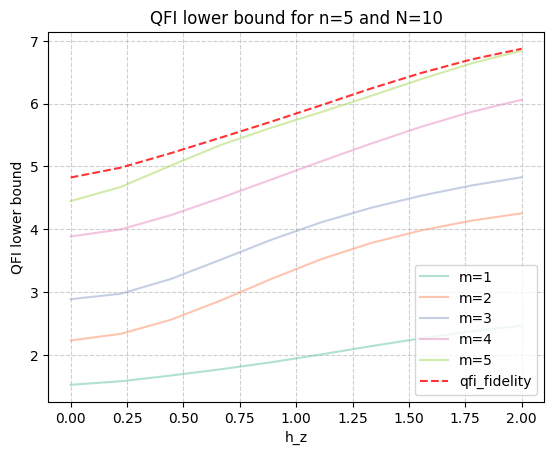

In [74]:
m_max = 6
h_z = np.linspace(h_z_bounds[0], 
                  h_z_bounds[1], 
                  num=graining_x) 

for m in range(1, m_max): # m_max):
    plt.plot(h_z, y[m, :], label=f'm={m}', alpha=0.5)

plt.plot(h_z, g_t, label=f'qfi_fidelity', linestyle='--', color='red', alpha=0.8)

plt.xlabel('h_z')
plt.ylabel('QFI lower bound')
plt.title(f'QFI lower bound for n={n} and N={N}')
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability
plt.legend()


/tmp/ipykernel_5329/387321353.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("viridis", m_max - 1)


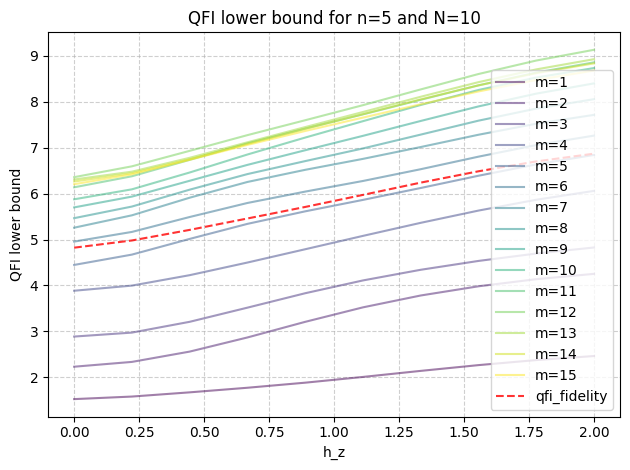

In [72]:
# Get viridis colormap with m_max - 1 entries


from matplotlib.cm import get_cmap
cmap = get_cmap("viridis", m_max - 1)
colors = [cmap(i) for i in range(m_max - 1)]

for m in range(1, m_max):
    plt.plot(h_z, y[m, :], label=f'm={m}', color=colors[m-1], alpha=0.5)

# Final line in red
plt.plot(h_z, np.array(g_t), label='qfi_fidelity', linestyle='--', color='red', alpha=0.8)

plt.xlabel('h_z')
plt.ylabel('QFI lower bound')
plt.title(f'QFI lower bound for n={n} and N={N}')
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


optimal at m=1
      message: Solution found.
      success: True
       status: 0
          fun: 2.462354640110753
            x: 1.9999959949686341
          nit: 27
         nfev: 27
 value_at_min: 1.5235426594790267
 value_at_max: 2.462355998032972

optimal at m=4
      message: Solution found.
      success: True
       status: 0
          fun: 6.059860886722034
            x: 1.9999959949686341
          nit: 27
         nfev: 27
 value_at_min: 3.884493186469839
 value_at_max: 6.059863951859334


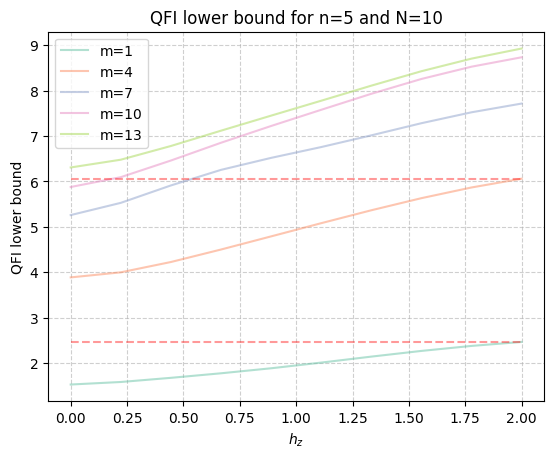

In [65]:
for m in range(1, m_max, 3): # m_max):
    plt.plot(h_z, y[m, :], label=f'm={m}', alpha=0.5)
plt.xlabel('h_z')
plt.ylabel('QFI lower bound')
plt.title(f'QFI lower bound for n={n} and N={N}')
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability
plt.legend()

print("\noptimal at m=1")

r1 = qfi_optimization_v200.get_best_lower_bound(N, n, a_x, delta, 1, initial_state, DEBUG, derivative_delta, h_z_bounds=h_z_bounds)
print(r1)
plt.hlines(r1.fun, h_z[0], h_z[-1], color='r', alpha=0.4, linestyle='--')

print("\noptimal at m=4")

r2 = qfi_optimization_v200.get_best_lower_bound(N, n, a_x, delta, 4, initial_state, DEBUG, derivative_delta, h_z_bounds=h_z_bounds)
print(r2)
plt.hlines(r2.fun, h_z[0], h_z[-1], color='r', alpha=0.4, linestyle='--')

plt.grid(True, linestyle="--", alpha=0.6)
plt.xlabel("$h_z$")
plt.ylabel("QFI lower bound")
plt.show()


In [66]:
results = []
for m in range(1, 6):
    result = qfi_optimization.get_best_lower_bound(n, a_x, delta, m, trace_out_index, derivative_delta, h_z_bounds=h_z_bounds)
    results.append(result)
    print(f"\noptimal at m={m}")
    print(result)
    print("\n")


NameError: name 'qfi_optimization' is not defined

In [ ]:
x_s = [i.x for i in results]
x_s

[2.8405751567503796,
 2.8019484638315437,
 2.8019484654403626,
 2.8019484650248523,
 2.801948463794223]

In [ ]:
details = []

for m in range(1,6):
        details.append(qfi_optimization.get_results_for_m_hz(n, a_x, delta, m, trace_out_index, derivative_delta)(x_s[m-1]))

In [ ]:
[print(i["sub_qfi_bound"]) for i in details]

5.419389349899805
5.939113298811448
5.939113301479092
5.939113300790132
5.9391132987494535


[None, None, None, None, None]

In [ ]:
[print(d) for d in details[0].keys()];

fidelity_truncated
fidelity_truncated_generalized
lower_tqfi
upper_tqfi
fidelity_true
qfi_fidelity
sub_qfi_bound
super_qfi_bound
trace_rho
trace_rho_delta
purity_rho
purity_rho_delta
rank_rho
rank_rho_delta
truncated_eigenvalues
eigenvalues
QFI_from_SLD


In [ ]:
for m in range(len(details)):
    print(f"\n____________________\n m = {m+1}\n_________________________\n")
    print(f"\neigenvalue list: \n{details[m]["eigenvalues"]}")
    print(f"\ntruncated eigenvalues: \n{details[m]["truncated_eigenvalues"]}")
    print(f"\nsub qfi bound: \n{details[m]["lower_tqfi"]}")
    print(f"\nh_z = {x_s[m]}")


____________________
 m = 1
_________________________


eigenvalue list: 
[ 7.70782005e-01  2.29217995e-01  5.36573862e-17  2.93804385e-17
  2.54961085e-17  8.97779464e-18  6.13976507e-18  3.98211239e-18
  3.07466618e-18  1.41483927e-18  1.04070415e-18  7.54387391e-19
  5.89157761e-19  3.23535315e-19  1.94476273e-19  1.32760688e-19
  2.57122161e-20 -1.40437498e-19 -4.91219014e-19 -7.45679412e-19
 -8.52269981e-19 -1.22386588e-18 -1.70830922e-18 -2.53460553e-18
 -2.96669645e-18 -3.88480232e-18 -5.83882803e-18 -8.04174280e-18
 -1.05377658e-17 -2.55384218e-17 -3.80853210e-17 -1.63672437e-16]

truncated eigenvalues: 
[0.770782]

sub qfi bound: 
(6.791218210076976+1.2940598550772133e-15j)

h_z = 2.8405751567503796

____________________
 m = 2
_________________________


eigenvalue list: 
[ 7.56825154e-01  2.43174846e-01  3.51489723e-17  2.70315209e-17
  1.72197539e-17  8.30027048e-18  6.64092890e-18  3.72424351e-18
  2.78859878e-18  2.02770558e-18  1.88902630e-18  1.62073838e-18
  9.7101787

In [ ]:
data = []
for m in range(len(details)):
    eigenvalues = np.pad(
        [np.format_float_scientific(val, precision=5) for val in details[m]["eigenvalues"][:5]],
        (0, max(0, 5 - len(details[m]["eigenvalues"]))),
        constant_values="0.0e+00"
    )
    truncated_eigenvalues = np.pad(
        [np.format_float_scientific(val, precision=5) for val in details[m]["truncated_eigenvalues"][:5]],
        (0, max(0, 5 - len(details[m]["truncated_eigenvalues"]))),
        constant_values="0.0e+00"
    )
    
    row = [
        m + 1,  # m index
        *eigenvalues,  # First 5 eigenvalues (or padded with 0)
        *truncated_eigenvalues,  # First 5 truncated eigenvalues (or padded with 0)
        np.format_float_scientific(details[m]["lower_tqfi"], precision=3),  # Sub QFI bound
        np.format_float_scientific(x_s[m], precision=3)  # h_z value
    ]
    data.append(row)

# Define column names
columns = (
    ["m"] +
    [f"eigenvalue_{i+1}" for i in range(5)] +
    [f"truncated_eigenvalue_{i+1}" for i in range(5)] +
    ["lower_tqfi", "h_z"]
)

# Create DataFrame
df = pd.DataFrame(data, columns=columns)
df.to_csv("test_truncation_eigenvalues.csv")
# Display DataFrame
df

/home/ronin/miniforge3/envs/space/lib/python3.12/site-packages/numpy/core/arrayprint.py:1125: ComplexWarning: Casting complex values to real discards the imaginary part
  return dragon4_scientific(x, precision=precision, unique=unique,


,m,eigenvalue_1,eigenvalue_2,eigenvalue_3,eigenvalue_4,eigenvalue_5,truncated_eigenvalue_1,truncated_eigenvalue_2,truncated_eigenvalue_3,truncated_eigenvalue_4,truncated_eigenvalue_5,lower_tqfi,h_z
0,1,7.70782e-01,2.29218e-01,5.36574e-17,2.93804e-17,2.54961e-17,7.70782e-01,0.0e+00,0.0e+00,0.0e+00,0.0e+00,6.791e+00,2.841e+00
1,2,7.56825e-01,2.43175e-01,3.5149e-17,2.70315e-17,1.72198e-17,7.56825e-01,2.43175e-01,0.0e+00,0.0e+00,0.0e+00,9.112e+00,2.802e+00
2,3,7.56825e-01,2.43175e-01,1.06744e-16,6.18431e-17,3.63284e-17,7.56825e-01,2.43175e-01,1.06744e-16,0.0e+00,0.0e+00,9.112e+00,2.802e+00
3,4,7.56825e-01,2.43175e-01,5.88099e-17,3.96896e-17,2.56839e-17,7.56825e-01,2.43175e-01,5.88099e-17,3.96896e-17,0.0e+00,9.112e+00,2.802e+00
4,5,7.56825e-01,2.43175e-01,1.25818e-16,4.14561e-17,1.65305e-17,7.56825e-01,2.43175e-01,1.25818e-16,4.14561e-17,1.65305e-17,9.112e+00,2.802e+00


In [ ]:
df["lower_tqfi"]

0    6.791e+00
1    9.112e+00
2    9.112e+00
3    9.112e+00
4    9.112e+00
Name: lower_tqfi, dtype: object

In [ ]:
results = [qfi_optimization.get_best_lower_bound(n, a_x, delta, m, trace_out_index, derivative_delta, h_z_bounds=h_z_bounds)
           for m in range(1, m_max)]

KeyboardInterrupt: 

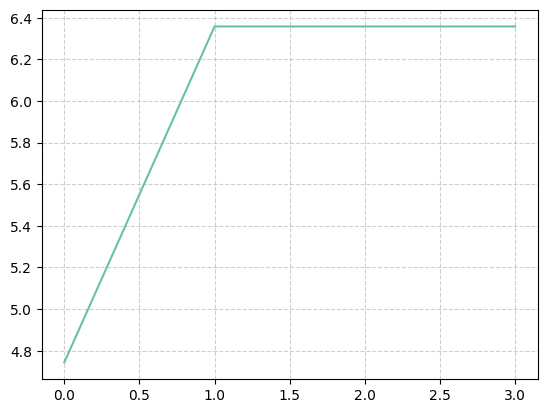

In [ ]:
max_lower_bounds = [r.fun for r in results]
plt.plot(max_lower_bounds)

plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability

In [5]:
help(np.linspace)

Help on _ArrayFunctionDispatcher in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.

    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].

    The endpoint of the interval can optionally be excluded.

    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.

    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior can
        still be obtained with ``np.linspace(start, stop, num).astype(int)``

    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is exc